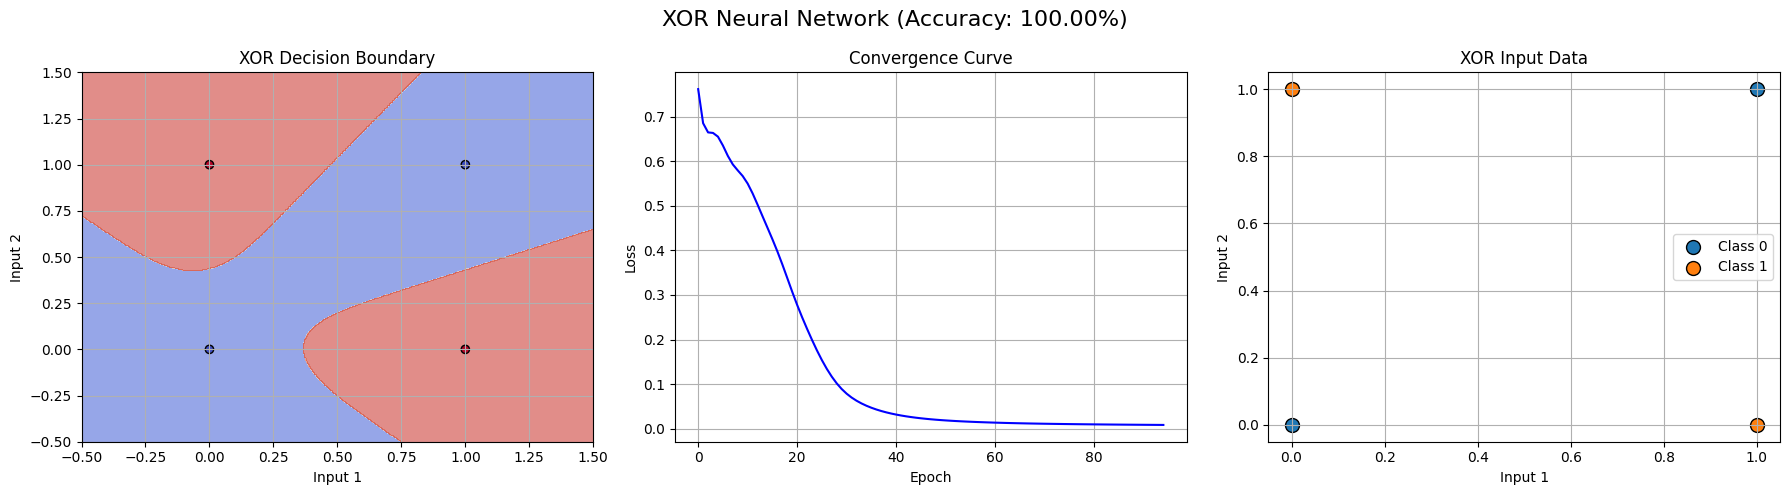

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# XOR Data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Define and train MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', solver='adam', 
                      learning_rate_init=0.1, max_iter=1000, random_state=42, verbose=False)
model.fit(X, y)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

# Plot decision boundary
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title("XOR Decision Boundary")
    ax.set_xlabel("Input 1")
    ax.set_ylabel("Input 2")
    ax.grid(True)

# Plot convergence curve
def plot_convergence_curve(model, ax):
    if hasattr(model, "loss_curve_"):
        ax.plot(model.loss_curve_, color='blue')
        ax.set_title("Convergence Curve")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'No loss curve available', ha='center', va='center')

# 2D input-target plot
def plot_data_points(X, y, ax):
    for label in np.unique(y):
        ax.scatter(X[y == label][:, 0], X[y == label][:, 1], 
                   label=f"Class {label}", s=100, edgecolor='black')
    ax.set_title("XOR Input Data")
    ax.set_xlabel("Input 1")
    ax.set_ylabel("Input 2")
    ax.legend()
    ax.grid(True)

# Plot all
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
plot_decision_boundary(model, X, y, axs[0])
plot_convergence_curve(model, axs[1])
plot_data_points(X, y, axs[2])
plt.suptitle(f"XOR Neural Network (Accuracy: {accuracy*100:.2f}%)", fontsize=16)
plt.tight_layout()
plt.show()
